In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("space/imputed3-with-dons.csv")

In [2]:
mean_wl_time = df['wl_time'].mean()
print(f"Mean waiting list time: {mean_wl_time}")
df['wl_time'] = df['wl_time'].apply(lambda x: 0 if x < mean_wl_time else 1)
print(df['wl_time'].value_counts(normalize=True))

Mean waiting list time: 192.52839426430694
0    0.716807
1    0.283193
Name: wl_time, dtype: float64


In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

y = df['wl_time']
X = df.drop(['wl_time'], axis=1)

#Keep the first three features in X
#X = X.iloc[:, :20]

#Print names of the features
print(X.columns)

col_names = X.columns

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a logistic regression model
log = LogisticRegression(max_iter=1000)

# Perform k-fold cross-validation and compute the initial F1 score
scores = cross_val_score(log, X, y, cv=5, scoring='f1')
avg_score = np.mean(scores)
print("Initial F1 score: {:.4f}".format(avg_score))

# Create a recursive feature elimination object
selector = RFECV(estimator=log, cv=5, scoring='f1', verbose=1)

#Print num of features
print(f"Num of features: {X.shape[1]}")

# Fit the recursive feature elimination object to the data
selector.fit(X, y)

# Print the optimal number of features
print(f"Optimal number of features: {selector.n_features_}")

# Print the mask of selected features
print(f"The mask of the selected features: {selector.support_}")

# Print the ranking of the features
print(f"The ranking of the features: {selector.ranking_}")

Index(['num_prev_tx', 'thoracic_dgn', 'tah', 'vas', 'onvent', 'icu',
       'inotropic', 'gender', 'abo', 'wgt_kg_tcr',
       ...
       'simulect_ind', 'simulect_maint', 'steroids_ind', 'steroids_maint',
       'prograf_ind', 'prograf_maint', 'imuran_ind', 'imuran_maint',
       'cellcept_ind', 'cellcept_maint'],
      dtype='object', length=164)
Initial F1 score: 0.8949
Num of features: 164
Fitting estimator with 164 features.
Fitting estimator with 163 features.
Fitting estimator with 162 features.
Fitting estimator with 161 features.
Fitting estimator with 160 features.
Fitting estimator with 159 features.
Fitting estimator with 158 features.
Fitting estimator with 157 features.
Fitting estimator with 156 features.
Fitting estimator with 155 features.
Fitting estimator with 154 features.
Fitting estimator with 153 features.
Fitting estimator with 152 features.
Fitting estimator with 151 features.
Fitting estimator with 150 features.
Fitting estimator with 149 features.
Fitting est

In [4]:
#Make df into a dataframe
df = pd.DataFrame(X)

#Rename the columns
df.columns = col_names

#Print the names of all the columns
print(df.columns)

#Print shape of df
print(df.shape)

# Print the name of features that are selected with their ranking and support sorted according to their ranking
feature_rankings = list(zip(df.columns, selector.ranking_, selector.support_))
feature_rankings_sorted = sorted(feature_rankings, key=lambda x: x[1])
for feature, ranking, support in feature_rankings_sorted:
    print(f"Feature: {feature}, Ranking: {ranking}, Support: {support}")


Index(['num_prev_tx', 'thoracic_dgn', 'tah', 'vas', 'onvent', 'icu',
       'inotropic', 'gender', 'abo', 'wgt_kg_tcr',
       ...
       'simulect_ind', 'simulect_maint', 'steroids_ind', 'steroids_maint',
       'prograf_ind', 'prograf_maint', 'imuran_ind', 'imuran_maint',
       'cellcept_ind', 'cellcept_maint'],
      dtype='object', length=164)
(77410, 164)
Feature: thoracic_dgn, Ranking: 1, Support: True
Feature: days_stat1, Ranking: 1, Support: True
Feature: days_stat1a, Ranking: 1, Support: True
Feature: days_stat2, Ranking: 1, Support: True
Feature: days_stat1b, Ranking: 1, Support: True
Feature: days_stata4, Ranking: 1, Support: True
Feature: days_stata6, Ranking: 1, Support: True
Feature: init_stat, Ranking: 1, Support: True
Feature: init_age, Ranking: 1, Support: True
Feature: init_hgt_cm_calc, Ranking: 1, Support: True
Feature: init_wgt_kg_calc, Ranking: 1, Support: True
Feature: init_bmi_calc, Ranking: 1, Support: True
Feature: end_hgt_cm_calc, Ranking: 1, Support: True
Fe

In [5]:
#Create a new dataframe with only the selected features
df_selected = df.iloc[:, selector.support_]

#Print the shape of the new dataframe
print(df_selected.shape)

#Add the columns names to the new dataframe
df_selected.columns = df.columns[selector.support_]

#Print the names of the columns in the new dataframe
print(df_selected.columns)

#Do a logistic regression on the new dataframe
log = LogisticRegression(max_iter=1000)

#Fit the model
log.fit(df_selected, y)

#Print the weights of the model with the corresponding feature name
for i in range(len(log.coef_[0])):
    print(f"Feature: {df_selected.columns[i]}, Weight: {log.coef_[0][i]}")

# Perform k-fold cross-validation and compute the initial F1 score
scores = cross_val_score(log, X, y, cv=5, scoring='f1')
avg_score = np.mean(scores)
print("F1_score after feature selection: {:.4f}".format(avg_score))

# Create df from df_selected without "thoracic_dgn"
#df_selected = df_selected.drop(['thoracic_dgn'], axis=1)
# Create a correlation matrix
corr_matrix = df_selected.corr()


(77410, 16)
Index(['thoracic_dgn', 'days_stat1', 'days_stat1a', 'days_stat2',
       'days_stat1b', 'days_stata4', 'days_stata6', 'init_stat', 'init_age',
       'init_hgt_cm_calc', 'init_wgt_kg_calc', 'init_bmi_calc',
       'end_hgt_cm_calc', 'end_wgt_kg_calc', 'end_bmi_calc', 'age'],
      dtype='object')
Feature: thoracic_dgn, Weight: 0.7265787170772302
Feature: days_stat1, Weight: 0.6390296185383879
Feature: days_stat1a, Weight: 1.4351369347439347
Feature: days_stat2, Weight: 6.028359148821868
Feature: days_stat1b, Weight: 4.235514622373179
Feature: days_stata4, Weight: 0.912343477385316
Feature: days_stata6, Weight: 0.3549305962519336
Feature: init_stat, Weight: 0.37942713850769627
Feature: init_age, Weight: -20.14455511101874
Feature: init_hgt_cm_calc, Weight: -1.130504171665344
Feature: init_wgt_kg_calc, Weight: 0.5207407104602796
Feature: init_bmi_calc, Weight: -0.38784227207627436
Feature: end_hgt_cm_calc, Weight: 1.3798825181604282
Feature: end_wgt_kg_calc, Weight: -0.580084

F1_score after feature selection: 0.7302


<AxesSubplot: >

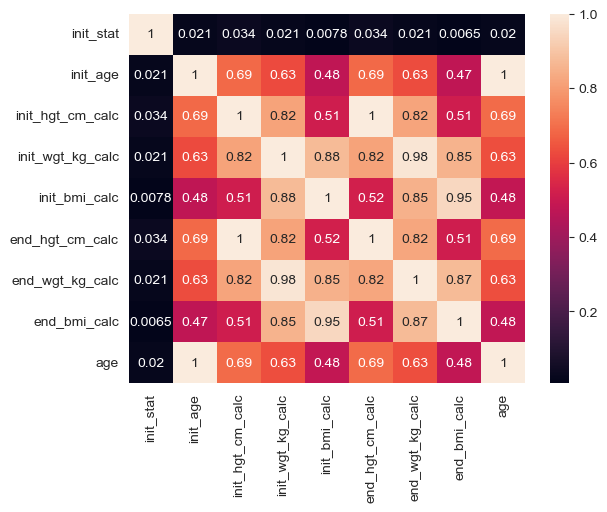

In [23]:
# import imputed data
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
df = pd.read_csv("space/imputed3-with-dons.csv")

features = ['thoracic_dgn', 'days_stat1', 'days_stat1a', 'days_stat2',
       'days_stat1b', 'days_stata4', 'days_stata6', 'init_stat', 'init_age',
       'init_hgt_cm_calc', 'init_wgt_kg_calc', 'init_bmi_calc',
       'end_hgt_cm_calc', 'end_wgt_kg_calc', 'end_bmi_calc', 'age']
df = df[features]

# Retrain the model on the new dataframe
log = LogisticRegression(max_iter=1000)
log.fit(df_selected, y)

#Evaluate the model using cross validation with 5 folds
scores = cross_val_score(log, df_selected, y, cv=5, scoring='f1')
avg_score = np.mean(scores)
print("F1_score after feature selection: {:.4f}".format(avg_score))

#Create a correlation matrix for the selected features
corr_matrix_2 = df_selected.corr()

#Creat a heatmap for corr_matrix_2
sns.heatmap(corr_matrix_2, annot=True)


In [24]:
#Print confusion matrix for the model
y_pred = cross_val_predict(log, df_selected, y, cv=5)
confusion_matrix(y, y_pred)

array([[50620,  4868],
       [ 6511, 15411]])

AUC score: 0.9515279755385633


/opt/homebrew/anaconda3/envs/edap01/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


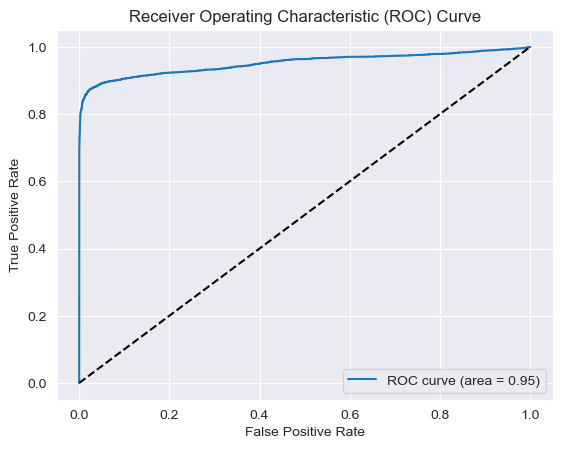

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# load the dataset and split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# train a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# predict the probabilities of the positive class for the testing data
y_pred_prob = model.predict_proba(X_test)[:, 1]

# compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print('AUC score:', auc_score)

# compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()